In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
sns.set_theme(style = 'darkgrid')

# Loading Data and Selecting Features

In [2]:
loan_data_inputs_train = pd.read_csv('loan_data_inputs_train.csv', index_col = 0)
loan_data_targets_train = pd.read_csv('loan_data_targets_train.csv', index_col = 0)
loan_data_inputs_test = pd.read_csv('loan_data_inputs_test.csv', index_col = 0)
loan_data_targets_test = pd.read_csv('loan_data_targets_test.csv', index_col = 0)

### Explore Data

In [3]:
loan_data_inputs_train.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
427211,427211,12796369,14818505,24000,24000,24000.0,36 months,8.90,762.08,A,...,1,0,0,1,0,0,0,0,0,0
206088,206088,1439740,1691948,10000,10000,10000.0,36 months,14.33,343.39,C,...,0,0,0,1,0,0,0,0,0,0
136020,136020,5214749,6556909,20425,20425,20425.0,36 months,8.90,648.56,A,...,0,0,0,1,0,0,0,0,0,0
412305,412305,13827698,15890016,17200,17200,17200.0,36 months,16.59,609.73,D,...,0,0,0,1,0,0,0,0,0,0
36159,36159,422455,496525,8400,8400,7450.0,36 months,12.84,282.40,C,...,0,1,0,1,0,0,0,0,0,0


In [4]:
loan_data_inputs_train.shape, loan_data_targets_train.shape

((373028, 324), (373028, 1))

In [5]:
loan_data_inputs_test.shape, loan_data_targets_test.shape

((93257, 324), (93257, 1))

### Selecting Features

In [6]:
# Select a limited set of input variables in a new dataframe.
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:0-2',
'pub_rec:3-4',
'pub_rec:>=5',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86',
]]

In [7]:
# Store the reference category dummy variables
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'delinq_2yrs:>=4',
'inq_last_6mths:>6',
'open_acc:0',
'pub_rec:0-2',
'total_acc:<=27',
'acc_now_delinq:0',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [8]:
# Drop the variables in the list with reference categories. 
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
427211,True,False,False,False,False,False,False,True,0,False,...,1,0,0,0,1,0,0,0,0,0
206088,False,False,True,False,False,False,False,True,0,False,...,0,1,0,0,1,0,0,0,0,0
136020,True,False,False,False,False,False,False,True,0,False,...,0,0,1,0,1,0,0,0,0,0
412305,False,False,False,True,False,False,False,False,0,False,...,0,1,0,0,1,0,0,0,0,0
36159,False,False,True,False,False,False,False,True,0,False,...,1,0,0,0,1,0,0,0,0,0


# PD Model Estimation
### Logistic Regression

In [9]:
reg = LogisticRegression()
reg.fit(inputs_train, loan_data_targets_train)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [10]:
feature_name = inputs_train.columns.values

In [11]:
def create_summary_table(dataset, model, p_value = None):
    summary_table = pd.DataFrame(columns = ['Feature name'], data = dataset)
    summary_table['Coefficients'] = np.transpose(model.coef_)
    summary_table.index += 1
    summary_table.loc[0] = ['Intercept', model.intercept_[0]]
    summary_table = summary_table.sort_index()
    if p_value != None:
        p_values = model.p_values
        p_values = np.append(np.nan, np.array(p_values))
        summary_table['p_values'] = p_values
    else:
        pass
    return summary_table

In [12]:
create_summary_table(feature_name, reg)

,Feature name,Coefficients
0,Intercept,-0.266634
1,grade:A,0.893592
2,grade:B,0.705475
3,grade:C,0.508214
4,grade:D,0.327517
...,...,...
100,mths_since_last_record:3-20,0.206991
101,mths_since_last_record:21-31,0.135279
102,mths_since_last_record:32-80,0.273268
103,mths_since_last_record:81-86,-0.063889


## Build a Logistic Regression Model with P-Values

In [13]:
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)

    def fit(self,X,y):
        X = np.asarray(X, dtype=float)
        y = np.ravel(y)
        self.model.fit(X,y)
        
        # Get p-values for the fitted model
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X) # Fisher Information Matrix
        Cramer_Rao = np.linalg.inv(F_ij) # Inverse Information Matrix
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates # z-score for eaach model coefficient
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores] # two tailed test for p-values
        
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [14]:
reg = LogisticRegression_with_p_values()
reg.fit(inputs_train, loan_data_targets_train)

In [15]:
create_summary_table(feature_name, reg, p_value = 'Yes')

,Feature name,Coefficients,p_values
0,Intercept,-0.266634,NaN
1,grade:A,0.893592,4.023694e-19
2,grade:B,0.705475,2.511147e-27
3,grade:C,0.508214,4.608871e-17
4,grade:D,0.327517,1.368996e-08
...,...,...,...
100,mths_since_last_record:3-20,0.206991,1.104578e-01
101,mths_since_last_record:21-31,0.135279,2.480219e-01
102,mths_since_last_record:32-80,0.273268,1.223233e-03
103,mths_since_last_record:81-86,-0.063889,4.878139e-01


In [16]:
# Remove some statistically insignificant dummy variables based on p-value.
inputs_train_with_ref_cat_reg2 = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86',
]]

In [17]:
ref_categories_reg2 = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [18]:
inputs_train = inputs_train_with_ref_cat_reg2.drop(ref_categories_reg2, axis = 1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
427211,True,False,False,False,False,False,False,True,0,False,...,1,0,0,0,1,0,0,0,0,0
206088,False,False,True,False,False,False,False,True,0,False,...,0,1,0,0,1,0,0,0,0,0
136020,True,False,False,False,False,False,False,True,0,False,...,0,0,1,0,1,0,0,0,0,0
412305,False,False,False,True,False,False,False,False,0,False,...,0,1,0,0,1,0,0,0,0,0
36159,False,False,True,False,False,False,False,True,0,False,...,1,0,0,0,1,0,0,0,0,0


In [19]:
reg2 = LogisticRegression_with_p_values()
reg2.fit(inputs_train, loan_data_targets_train)

In [20]:
feature_name = inputs_train.columns.values

In [21]:
create_summary_table(feature_name, reg2, p_value = 'Yes')

,Feature name,Coefficients,p_values
0,Intercept,-0.654501,NaN
1,grade:A,1.008527,4.412938e-24
2,grade:B,0.841071,7.730018e-40
3,grade:C,0.650121,2.309661e-28
4,grade:D,0.474361,1.901030e-17
...,...,...,...
80,mths_since_last_record:3-20,0.208670,9.335624e-02
81,mths_since_last_record:21-31,0.087096,4.353436e-01
82,mths_since_last_record:32-80,0.321212,7.029131e-05
83,mths_since_last_record:81-86,-0.076701,3.915016e-01


In [22]:
import pickle

In [23]:
pickle.dump(reg2, open('pd_model.sav', 'wb'))

# PD Model Validation (Test)
### Out-of-sample validation (test)

In [24]:
inputs_test_with_ref_cat = loan_data_inputs_test.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86',
]]

In [25]:
ref_categories_test = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [26]:
# Using the same variables as reg2 Model
inputs_test = inputs_test_with_ref_cat.drop(ref_categories_test, axis = 1)
inputs_test.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,False,False,True,False,False,False,False,True,0,False,...,1,0,0,0,1,0,0,0,0,0
288564,False,False,False,False,True,False,False,True,0,False,...,0,0,0,0,1,0,0,0,0,0
213591,False,False,True,False,False,False,False,True,0,False,...,0,0,1,0,1,0,0,0,0,0
263083,False,False,True,False,False,False,False,True,0,False,...,1,0,0,0,1,0,0,0,0,0
165001,True,False,False,False,False,False,False,True,0,False,...,0,0,1,0,1,0,0,0,0,0


In [27]:
# Calculates the predicted values for the dependent variable
y_hat_test = reg2.model.predict(inputs_test)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [28]:
# Calculates the predicted probability values for the dependent variable
y_hat_test_proba = reg2.model.predict_proba(inputs_test)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [29]:
# take only the probabilities for being 1.
y_hat_test_proba = y_hat_test_proba[:, 1]

In [30]:
loan_data_targets_test_temp = loan_data_targets_test

In [31]:
loan_data_targets_test_temp.reset_index(drop = True, inplace = True)

In [32]:
df_actual_predicted_probs = pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)

In [33]:
df_actual_predicted_probs.columns = ['loan_data_targets_test', 'y_hat_test_proba']

In [34]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba
0,1,0.938396
1,1,0.883521
2,1,0.887858
3,1,0.960141
4,1,0.970308


### Accuracy and Area under the Curve

In [35]:
# Predicted probability greater than the threshold has a value of 1 otherwise 0
tr = 0.9
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

In [36]:
# Confusion Matrix.
conf_matrix = pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], 
                               df_actual_predicted_probs['y_hat_test'],
                               rownames = ['Actual'], colnames = ['Predicted'])

conf_matrix

Predicted,0,1
Actual,,
0,5985,3042
1,29687,54543


In [37]:
# Getting percentages value of Confusion Matrix
conf_matrix_perc = conf_matrix/df_actual_predicted_probs.shape[0]
conf_matrix_perc

Predicted,0,1
Actual,,
0,0.064177,0.032620
1,0.318335,0.584868


In [38]:
# Accuracy of the model
Accurancy = (conf_matrix_perc).iloc[0, 0] + (conf_matrix_perc).iloc[1, 1]
Accurancy

0.6490451118950856

In [39]:
from sklearn.metrics import roc_curve, roc_auc_score

In [40]:
# Returns the Receiver Operating Characteristic (ROC) Curve from a set of actual values and their predicted probabilities.
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

(array([0.        , 0.        , 0.        , ..., 0.99988922, 0.99988922,
        1.        ]),
 array([0.00000000e+00, 1.18722545e-05, 7.12335272e-05, ...,
        9.99988128e-01, 1.00000000e+00, 1.00000000e+00]),
 array([       inf, 0.99532753, 0.99415225, ..., 0.4884855 , 0.48595801,
        0.46519593]))

In [41]:
# Returns the Receiver Operating Characteristic (ROC) Curve from a set of actual values and their predicted probabilities.
fpr, tpr, thresholds = roc_curve(
    df_actual_predicted_probs['loan_data_targets_test'], 
    df_actual_predicted_probs['y_hat_test_proba'])

Text(0.5, 1.0, 'ROC curve')

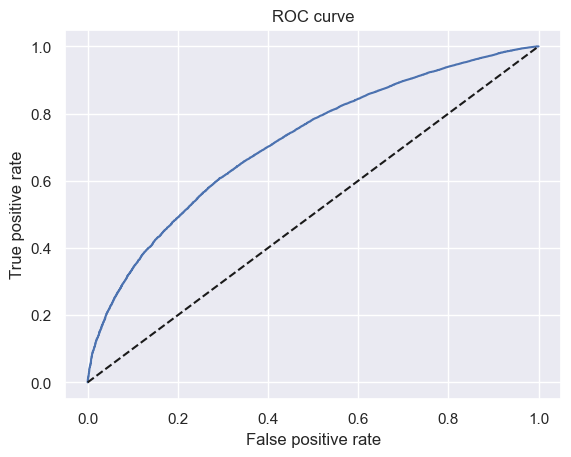

In [42]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

In [43]:
# Calculates the Area Under the Receiver Operating Characteristic Curve (AUROC)
AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
AUROC

0.7136625779000803

## Applying the PD Model


### Creating Scorecard

In [44]:
df_ref_categories = pd.DataFrame(ref_categories_reg2, columns = ['Feature name'])
df_ref_categories['Coefficients'] = 0
df_ref_categories['p_values'] = np.nan
df_ref_categories

,Feature name,Coefficients,p_values
0,grade:G,0,NaN
1,home_ownership:RENT_OTHER_NONE_ANY,0,NaN
2,addr_state:ND_NE_IA_NV_FL_HI_AL,0,NaN
3,verification_status:Verified,0,NaN
4,purpose:educ__sm_b__wedd__ren_en__mov__house,0,NaN
5,initial_list_status:f,0,NaN
6,term:60,0,NaN
7,emp_length:0,0,NaN
8,mths_since_issue_d:>84,0,NaN
9,int_rate:>20.281,0,NaN


In [45]:
# Using the summary table for reg2 Model (The Second/Final PD Model
summary_table = create_summary_table(feature_name, reg2, p_value = 'Yes')

In [46]:
df_scorecard = pd.concat([summary_table, df_ref_categories])
df_scorecard = df_scorecard.reset_index()
df_scorecard

,index,Feature name,Coefficients,p_values
0,0,Intercept,-0.654501,NaN
1,1,grade:A,1.008527,4.412938e-24
2,2,grade:B,0.841071,7.730018e-40
3,3,grade:C,0.650121,2.309661e-28
4,4,grade:D,0.474361,1.901030e-17
...,...,...,...,...
97,12,acc_now_delinq:0,0.000000,NaN
98,13,annual_inc:<20K,0.000000,NaN
99,14,dti:>35,0.000000,NaN
100,15,mths_since_last_delinq:0-3,0.000000,NaN


In [47]:
df_scorecard['Original feature name'] = df_scorecard['Feature name'].str.split(':').str[0]

In [48]:
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name
0,0,Intercept,-0.654501,NaN,Intercept
1,1,grade:A,1.008527,4.412938e-24,grade
2,2,grade:B,0.841071,7.730018e-40,grade
3,3,grade:C,0.650121,2.309661e-28,grade
4,4,grade:D,0.474361,1.901030e-17,grade
...,...,...,...,...,...
97,12,acc_now_delinq:0,0.000000,NaN,acc_now_delinq
98,13,annual_inc:<20K,0.000000,NaN,annual_inc
99,14,dti:>35,0.000000,NaN,dti
100,15,mths_since_last_delinq:0-3,0.000000,NaN,mths_since_last_delinq


In [49]:
min_score = 300
max_score = 850

In [50]:
def cal_groupby_min_max_sum(dataset, groupby_col, col, method = None):
    if method == 'min':
        return dataset.groupby(groupby_col)[col].min().sum()
    elif method == 'max':
        return dataset.groupby(groupby_col)[col].max().sum()

In [51]:
min_sum_coef = cal_groupby_min_max_sum(df_scorecard, 'Original feature name', 'Coefficients', 'min')
min_sum_coef

-1.0654978482400042

In [52]:
max_sum_coef = cal_groupby_min_max_sum(df_scorecard, 'Original feature name', 'Coefficients', 'max')
max_sum_coef

5.952962053146262

In [53]:
# Calculate score based on model coefficients
# AND scales the model's coefficients to fit within a specified score range (min_score to max_score)
df_scorecard['Score - Calculation'] = df_scorecard['Coefficients'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)

df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation
0,0,Intercept,-0.654501,NaN,Intercept,-51.289812
1,1,grade:A,1.008527,4.412938e-24,grade,79.033000
2,2,grade:B,0.841071,7.730018e-40,grade,65.910302
3,3,grade:C,0.650121,2.309661e-28,grade,50.946593
4,4,grade:D,0.474361,1.901030e-17,grade,37.173204
...,...,...,...,...,...,...
97,12,acc_now_delinq:0,0.000000,NaN,acc_now_delinq,0.000000
98,13,annual_inc:<20K,0.000000,NaN,annual_inc,0.000000
99,14,dti:>35,0.000000,NaN,dti,0.000000
100,15,mths_since_last_delinq:0-3,0.000000,NaN,mths_since_last_delinq,0.000000


In [54]:
df_scorecard.loc[0, 'Score - Calculation'] = ((df_scorecard.loc[0, 'Coefficients'] - min_sum_coef) / 
                                              (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score

df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation
0,0,Intercept,-0.654501,NaN,Intercept,332.207683
1,1,grade:A,1.008527,4.412938e-24,grade,79.033000
2,2,grade:B,0.841071,7.730018e-40,grade,65.910302
3,3,grade:C,0.650121,2.309661e-28,grade,50.946593
4,4,grade:D,0.474361,1.901030e-17,grade,37.173204
...,...,...,...,...,...,...
97,12,acc_now_delinq:0,0.000000,NaN,acc_now_delinq,0.000000
98,13,annual_inc:<20K,0.000000,NaN,annual_inc,0.000000
99,14,dti:>35,0.000000,NaN,dti,0.000000
100,15,mths_since_last_delinq:0-3,0.000000,NaN,mths_since_last_delinq,0.000000


In [55]:
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary
0,0,Intercept,-0.654501,NaN,Intercept,332.207683,332.0
1,1,grade:A,1.008527,4.412938e-24,grade,79.033000,79.0
2,2,grade:B,0.841071,7.730018e-40,grade,65.910302,66.0
3,3,grade:C,0.650121,2.309661e-28,grade,50.946593,51.0
4,4,grade:D,0.474361,1.901030e-17,grade,37.173204,37.0
...,...,...,...,...,...,...,...
97,12,acc_now_delinq:0,0.000000,NaN,acc_now_delinq,0.000000,0.0
98,13,annual_inc:<20K,0.000000,NaN,annual_inc,0.000000,0.0
99,14,dti:>35,0.000000,NaN,dti,0.000000,0.0
100,15,mths_since_last_delinq:0-3,0.000000,NaN,mths_since_last_delinq,0.000000,0.0


In [56]:
# The minimum score equal to 300 (what we set above)
cal_groupby_min_max_sum(df_scorecard, 'Original feature name', 'Score - Preliminary', 'min')

300.0

In [57]:
# The maximum score does not equal to the value we set above
cal_groupby_min_max_sum(df_scorecard, 'Original feature name', 'Score - Preliminary', 'max')

853.0

In [58]:
# Maximum value does not equal to the value that we set aboveas,
# we need to evaluate the value based on differences.
df_scorecard['Difference'] = df_scorecard['Score - Preliminary'] - df_scorecard['Score - Calculation']
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference
0,0,Intercept,-0.654501,NaN,Intercept,332.207683,332.0,-0.207683
1,1,grade:A,1.008527,4.412938e-24,grade,79.033000,79.0,-0.033000
2,2,grade:B,0.841071,7.730018e-40,grade,65.910302,66.0,0.089698
3,3,grade:C,0.650121,2.309661e-28,grade,50.946593,51.0,0.053407
4,4,grade:D,0.474361,1.901030e-17,grade,37.173204,37.0,-0.173204
...,...,...,...,...,...,...,...,...
97,12,acc_now_delinq:0,0.000000,NaN,acc_now_delinq,0.000000,0.0,0.000000
98,13,annual_inc:<20K,0.000000,NaN,annual_inc,0.000000,0.0,0.000000
99,14,dti:>35,0.000000,NaN,dti,0.000000,0.0,0.000000
100,15,mths_since_last_delinq:0-3,0.000000,NaN,mths_since_last_delinq,0.000000,0.0,0.000000


In [59]:
df_scorecard['Score - Final'] = df_scorecard['Score - Preliminary']
df_scorecard.loc[8, 'Score - Final'] = 6
df_scorecard.loc[68, 'Score - Final'] = 12
df_scorecard.loc[77, 'Score - Final'] = 16
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,0,Intercept,-0.654501,NaN,Intercept,332.207683,332.0,-0.207683,332.0
1,1,grade:A,1.008527,4.412938e-24,grade,79.033000,79.0,-0.033000,79.0
2,2,grade:B,0.841071,7.730018e-40,grade,65.910302,66.0,0.089698,66.0
3,3,grade:C,0.650121,2.309661e-28,grade,50.946593,51.0,0.053407,51.0
4,4,grade:D,0.474361,1.901030e-17,grade,37.173204,37.0,-0.173204,37.0
...,...,...,...,...,...,...,...,...,...
97,12,acc_now_delinq:0,0.000000,NaN,acc_now_delinq,0.000000,0.0,0.000000,0.0
98,13,annual_inc:<20K,0.000000,NaN,annual_inc,0.000000,0.0,0.000000,0.0
99,14,dti:>35,0.000000,NaN,dti,0.000000,0.0,0.000000,0.0
100,15,mths_since_last_delinq:0-3,0.000000,NaN,mths_since_last_delinq,0.000000,0.0,0.000000,0.0


In [60]:
cal_groupby_min_max_sum(df_scorecard, 'Original feature name', 'Score - Final', 'min')

300.0

In [61]:
cal_groupby_min_max_sum(df_scorecard, 'Original feature name', 'Score - Final', 'max')

850.0

```
Now, both the minimum score and the maximum score match what we set above.
```

### Calculating Credit Score

In [62]:
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,0,Intercept,-0.654501,NaN,Intercept,332.207683,332.0,-0.207683,332.0
1,1,grade:A,1.008527,4.412938e-24,grade,79.033000,79.0,-0.033000,79.0
2,2,grade:B,0.841071,7.730018e-40,grade,65.910302,66.0,0.089698,66.0
3,3,grade:C,0.650121,2.309661e-28,grade,50.946593,51.0,0.053407,51.0
4,4,grade:D,0.474361,1.901030e-17,grade,37.173204,37.0,-0.173204,37.0
...,...,...,...,...,...,...,...,...,...
97,12,acc_now_delinq:0,0.000000,NaN,acc_now_delinq,0.000000,0.0,0.000000,0.0
98,13,annual_inc:<20K,0.000000,NaN,annual_inc,0.000000,0.0,0.000000,0.0
99,14,dti:>35,0.000000,NaN,dti,0.000000,0.0,0.000000,0.0
100,15,mths_since_last_delinq:0-3,0.000000,NaN,mths_since_last_delinq,0.000000,0.0,0.000000,0.0


In [63]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat

In [64]:
inputs_test_with_ref_cat_w_intercept.insert(0,'Intercept', 1)

In [65]:
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,...,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,1,False,False,True,False,False,False,False,0,False,...,0,0,0,1,0,0,0,0,0,0
288564,1,False,False,False,False,True,False,False,0,False,...,0,0,0,1,0,0,0,0,0,0
213591,1,False,False,True,False,False,False,False,0,False,...,0,1,0,1,0,0,0,0,0,0
263083,1,False,False,True,False,False,False,False,0,False,...,0,0,0,1,0,0,0,0,0,0
165001,1,True,False,False,False,False,False,False,0,False,...,0,1,0,1,0,0,0,0,0,0


In [66]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat_w_intercept[df_scorecard['Feature name'].values]

In [67]:
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,...,emp_length:0,mths_since_issue_d:>84,int_rate:>20.281,mths_since_earliest_cr_line:<140,inq_last_6mths:>6,acc_now_delinq:0,annual_inc:<20K,dti:>35,mths_since_last_delinq:0-3,mths_since_last_record:0-2
362514,1,False,False,True,False,False,False,False,True,0,...,1,0,0,0,0,1,0,0,0,0
288564,1,False,False,False,False,True,False,False,True,0,...,0,0,1,0,0,1,0,0,1,0
213591,1,False,False,True,False,False,False,False,True,0,...,0,0,0,0,0,1,0,0,0,0
263083,1,False,False,True,False,False,False,False,True,0,...,0,0,0,1,0,1,0,0,0,0
165001,1,True,False,False,False,False,False,False,True,0,...,0,0,0,0,0,1,0,0,0,0


In [68]:
scorecard_scores = df_scorecard['Score - Final']

In [69]:
inputs_test_with_ref_cat_w_intercept.shape

(93257, 102)

In [70]:
scorecard_scores.shape

(102,)

In [71]:
scorecard_scores = scorecard_scores.values.reshape(102,1)

In [72]:
scorecard_scores.shape

(102, 1)

In [73]:
y_scores = inputs_test_with_ref_cat_w_intercept.dot(scorecard_scores)

In [74]:
y_scores.head()

,0
362514,596.0
288564,542.0
213591,545.0
263083,633.0
165001,656.0


In [75]:
inputs_train_with_ref_cat.to_csv('inputs_train_with_ref_cat.csv')

In [76]:
df_scorecard.to_csv('df_scorecard.csv')